# Dipen Prajapati
# Programming Exercise \#4
---

# Preamble

In [126]:
# optional code cell when using Google Colab with Google Drive

# remove the docstring comment block below in order to mount Google Drive
'''
# mount Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

# change directory using the magic command %cd
### replace [MY PATH] below with your own path in Google Drive ###
### %cd /content/drive/My\ Drive/[MY PATH] ###
'''

<>:4: SyntaxWarning: invalid escape sequence '\ '
<>:4: SyntaxWarning: invalid escape sequence '\ '
C:\Users\Dipen\AppData\Local\Temp\ipykernel_3048\3524984580.py:4: SyntaxWarning: invalid escape sequence '\ '
  '''


"\n# mount Google Drive in Google Colab\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\n# change directory using the magic command %cd\n### replace [MY PATH] below with your own path in Google Drive ###\n### %cd /content/drive/My\\ Drive/[MY PATH] ###\n"

In [127]:
import numpy as np
import pandas as pd
from scipy import stats as sps
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex
import matplotlib.pyplot as plt


# **1. Machine Learning for Diagnosis of 'Senioritis'**

## Problem 1.1

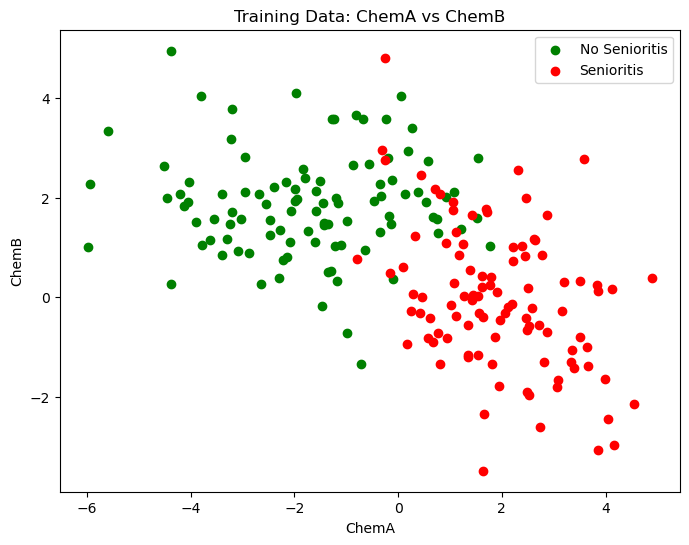

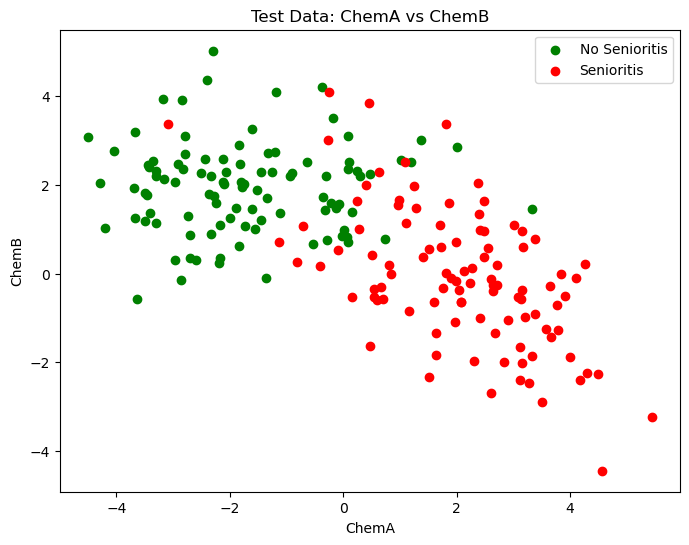

In [128]:
train_data = pd.read_csv('SenioritisTrainingData.csv')
test_data = pd.read_csv('SenioritisTestData.csv')

train_data['ClassLabel'] = train_data['ClassLabel'].map({'No Senioritis': 0, 'Senioritis': 1})
test_data['ClassLabel'] = test_data['ClassLabel'].map({'No Senioritis': 0, 'Senioritis': 1})

# Plotation Training Data
plt.figure(figsize=(8, 6))
plt.scatter(train_data[train_data['ClassLabel'] == 0]['ChemA'], train_data[train_data['ClassLabel'] == 0]['ChemB'], 
            color='green', label='No Senioritis')
plt.scatter(train_data[train_data['ClassLabel'] == 1]['ChemA'], train_data[train_data['ClassLabel'] == 1]['ChemB'], 
            color='red', label='Senioritis')
plt.xlabel('ChemA')
plt.ylabel('ChemB')
plt.title('Training Data: ChemA vs ChemB')
plt.legend()
plt.show()

# Plotation Test Data
plt.figure(figsize=(8, 6))
plt.scatter(test_data[test_data['ClassLabel'] == 0]['ChemA'], test_data[test_data['ClassLabel'] == 0]['ChemB'], 
            color='green', label='No Senioritis')
plt.scatter(test_data[test_data['ClassLabel'] == 1]['ChemA'], test_data[test_data['ClassLabel'] == 1]['ChemB'], 
            color='red', label='Senioritis')
plt.xlabel('ChemA')
plt.ylabel('ChemB')
plt.title('Test Data: ChemA vs ChemB')
plt.legend()
plt.show()


## Problem 1.2

### (a)

In [129]:

mean_no_snrts = train_data[train_data['ClassLabel'] == 0][['ChemA', 'ChemB']].mean()
mean_snrts = train_data[train_data['ClassLabel'] == 1][['ChemA', 'ChemB']].mean()

cov_no_snrts = np.cov(train_data[train_data['ClassLabel'] == 0][['ChemA', 'ChemB']].T)
cov_snrts = np.cov(train_data[train_data['ClassLabel'] == 1][['ChemA', 'ChemB']].T)

cov_pooled = (cov_no_snrts + cov_snrts) / 2

cov_pooled_inv = np.linalg.inv(cov_pooled)

# LDA classifier
def lda_classifier(x):
    likhd_no_snrts = -0.5 * np.dot(np.dot((x - mean_no_snrts), cov_pooled_inv), (x - mean_no_snrts).T)
    likhd_snrts = -0.5 * np.dot(np.dot((x - mean_snrts), cov_pooled_inv), (x - mean_snrts).T)
    return 1 if likhd_snrts > likhd_no_snrts else 0


### (b)

In [130]:
# QDA classifier
def qda_classifier(x):
    term_no_snrts = -0.5 * np.dot(np.dot((x - mean_no_snrts), np.linalg.inv(cov_no_snrts)), (x - mean_no_snrts).T)
    term_snrts = -0.5 * np.dot(np.dot((x - mean_snrts), np.linalg.inv(cov_snrts)), (x - mean_snrts).T)
    return 1 if term_snrts > term_no_snrts else 0


### (c)

In [131]:
p_no_snrts = len(train_data[train_data['ClassLabel'] == 0]) / len(train_data)
p_snrts = len(train_data[train_data['ClassLabel'] == 1]) / len(train_data)

mean_no_snrts = train_data[train_data['ClassLabel'] == 0][['ChemA', 'ChemB']].mean()
mean_snrts = train_data[train_data['ClassLabel'] == 1][['ChemA', 'ChemB']].mean()
var_no_snrts = train_data[train_data['ClassLabel'] == 0][['ChemA', 'ChemB']].var()
var_snrts = train_data[train_data['ClassLabel'] == 1][['ChemA', 'ChemB']].var()

# Naive Bayes classifier
def gnb_classifier(x):
    likhd_no_snrts = np.exp(-0.5 * ((x - mean_no_snrts) ** 2 / var_no_snrts).sum()) / np.sqrt((2 * np.pi) ** 2 * var_no_snrts.prod())
    likhd_snrts = np.exp(-0.5 * ((x - mean_snrts) ** 2 / var_snrts).sum()) / np.sqrt((2 * np.pi) ** 2 * var_snrts.prod())
    post_no_snrts = p_no_snrts * likhd_no_snrts
    post_snrts = p_snrts * likhd_snrts
    return 1 if post_snrts > post_no_snrts else 0


### (d)

In [132]:
# k-NN Classifier
from scipy.spatial.distance import euclidean

def knn_classifier(x, k=3):
    distances = []
    for i, row in train_data.iterrows():
        distance = euclidean(x, row[['ChemA', 'ChemB']].values)
        distances.append((distance, row['ClassLabel']))
    distances.sort(key=lambda x: x[0])
    k_nearest = distances[:k]
    votes = [label for _, label in k_nearest]
    return max(set(votes), key=votes.count)


## Problem 1.3

### (a)

In [133]:
# misclassification error
def misclass_rate(classifier, data):
    errors = 0
    for i, row in data.iterrows():
        predicted = classifier(row[['ChemA', 'ChemB']].values)
        if predicted != row['ClassLabel']:
            errors += 1
    return errors / len(data)

lda_error = misclass_rate(lda_classifier, test_data)
qda_error = misclass_rate(qda_classifier, test_data)
gnb_error = misclass_rate(gnb_classifier, test_data)
knn_error = misclass_rate(knn_classifier, test_data)

print(f'LDA Error: {lda_error}')
print(f'QDA Error: {qda_error}')
print(f'GNB Error: {gnb_error}')
print(f'k-NN Error: {knn_error}')


LDA Error: 0.085
QDA Error: 0.085
GNB Error: 0.085
k-NN Error: 0.095


### (b)

In [134]:
def tpr(classifier, data):
    tp = 0
    total_snrts = len(data[data['ClassLabel'] == 1])
    for i, row in data.iterrows():
        if row['ClassLabel'] == 1:
            if classifier(row[['ChemA', 'ChemB']].values) == 1:
                tp += 1
    return tp, tp / total_snrts

lda_tpr = tpr(lda_classifier, test_data)
qda_tpr = tpr(qda_classifier, test_data)
gnb_tpr = tpr(gnb_classifier, test_data)
knn_tpr = tpr(knn_classifier, test_data)

print(f'LDA TPR: {lda_tpr[1]}')
print(f'QDA TPR: {qda_tpr[1]}')
print(f'GNB TPR: {gnb_tpr[1]}')
print(f'k-NN TPR: {knn_tpr[1]}')


LDA TPR: 0.89
QDA TPR: 0.87
GNB TPR: 0.86
k-NN TPR: 0.91


### (c)

In [135]:
def fpr(classifier, data):
    fp = 0
    total_no_snrts = len(data[data['ClassLabel'] == 0])
    for i, row in data.iterrows():
        if row['ClassLabel'] == 0:
            if classifier(row[['ChemA', 'ChemB']].values) == 1:
                fp += 1
    return fp, fp / total_no_snrts

lda_fpr = fpr(lda_classifier, test_data)
qda_fpr = fpr(qda_classifier, test_data)
gnb_fpr = fpr(gnb_classifier, test_data)
knn_fpr = fpr(knn_classifier, test_data)

print(f'LDA FPR: {lda_fpr[1]}')
print(f'QDA FPR: {qda_fpr[1]}')
print(f'GNB FPR: {gnb_fpr[1]}')
print(f'k-NN FPR: {knn_fpr[1]}')


LDA FPR: 0.06
QDA FPR: 0.04
GNB FPR: 0.03
k-NN FPR: 0.1


### (d)

In [136]:
def tnr(classifier, data):
    tn = 0
    total_no_snrts = len(data[data['ClassLabel'] == 0])
    for i, row in data.iterrows():
        if row['ClassLabel'] == 0:
            if classifier(row[['ChemA', 'ChemB']].values) == 0:
                tn += 1
    return tn, tn / total_no_snrts

lda_tnr = tnr(lda_classifier, test_data)
qda_tnr = tnr(qda_classifier, test_data)
gnb_tnr = tnr(gnb_classifier, test_data)
knn_tnr = tnr(knn_classifier, test_data)

print(f'LDA TNR: {lda_tnr[1]}')
print(f'QDA TNR: {qda_tnr[1]}')
print(f'GNB TNR: {gnb_tnr[1]}')
print(f'k-NN TNR: {knn_tnr[1]}')


LDA TNR: 0.94
QDA TNR: 0.96
GNB TNR: 0.97
k-NN TNR: 0.9


### (e)

In [137]:
def fnr(classifier, data):
    fn = 0
    total_snrts = len(data[data['ClassLabel'] == 1])
    for i, row in data.iterrows():
        if row['ClassLabel'] == 1:
            if classifier(row[['ChemA', 'ChemB']].values) == 0:
                fn += 1
    return fn, fn / total_snrts

lda_fnr = fnr(lda_classifier, test_data)
qda_fnr = fnr(qda_classifier, test_data)
gnb_fnr = fnr(gnb_classifier, test_data)
knn_fnr = fnr(knn_classifier, test_data)

print(f'LDA FNR: {lda_fnr[1]}')
print(f'QDA FNR: {qda_fnr[1]}')
print(f'GNB FNR: {gnb_fnr[1]}')
print(f'k-NN FNR: {knn_fnr[1]}')


LDA FNR: 0.11
QDA FNR: 0.13
GNB FNR: 0.14
k-NN FNR: 0.09


## Problem 1.4

According to the performance metrics provided, I would recommend the LDA classifier for automated diagnostics of Senioritis. LDA demonstrates a balanced and robust performance across all metrics. It has the lowest misclassification error, 0.085, along with QDA and GNB, which indicates high overall accuracy. It also reveals a very high TPR for LDA at 0.89, correctly classifying 89% of the cases as Senioritis, something essential for a diagnostic tool. Also, the False Positive Rate is relatively low at 0.06, indicating low chances of misdiagnosis for a healthy person. The TNR for the said classifier is 0.94, showing its excellence in classifying correctly non-Senioritis cases. While k-NN has a slightly higher TPR, its higher error rate and FPR make it less suitable. LDA strikes the best balance between identifying Senioritis cases TPR and minimizing false alarms-low FPR. Therefore, it is most reliable choice for this medical diagnostic application where both accurate detection and minimizing unnecessary concerns are important.

## Problem 1.5

### (a)

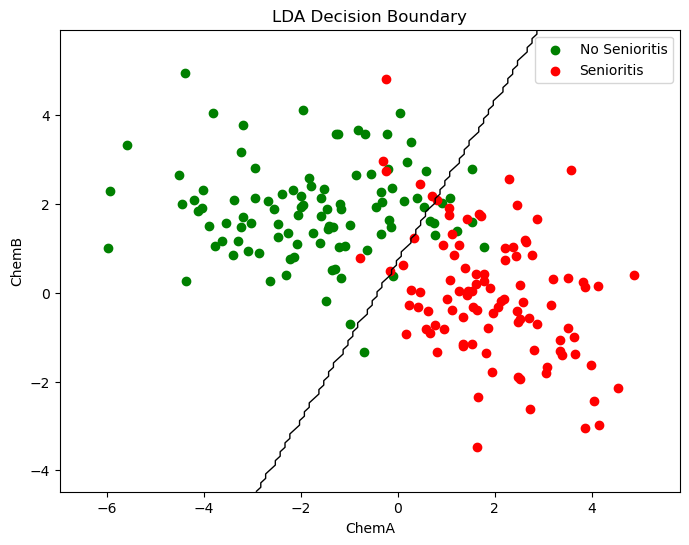

In [138]:
# LDA Decision Boundary:
def lda_classifier(x, mean_no_snrts, mean_snrts, cov_pooled_inv):
    log_likelihood_no_snrts = -0.5 * np.dot(np.dot((x - mean_no_snrts), cov_pooled_inv), (x - mean_no_snrts).T)
    log_likelihood_snrts = -0.5 * np.dot(np.dot((x - mean_snrts), cov_pooled_inv), (x - mean_snrts).T)
    return 1 if log_likelihood_snrts > log_likelihood_no_snrts else 0  

plt.figure(figsize=(8, 6))
plt.scatter(train_data[train_data['ClassLabel'] == 0]['ChemA'], train_data[train_data['ClassLabel'] == 0]['ChemB'], 
            color='green', label='No Senioritis')
plt.scatter(train_data[train_data['ClassLabel'] == 1]['ChemA'], train_data[train_data['ClassLabel'] == 1]['ChemB'], 
            color='red', label='Senioritis')

x_min, x_max = train_data['ChemA'].min() - 1, train_data['ChemA'].max() + 1
y_min, y_max = train_data['ChemB'].min() - 1, train_data['ChemB'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = np.array([lda_classifier(np.array([x, y]), mean_no_snrts, mean_snrts, cov_pooled_inv) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=1)

plt.xlabel('ChemA')
plt.ylabel('ChemB')
plt.title('LDA Decision Boundary')
plt.legend()
plt.show()


### (b)

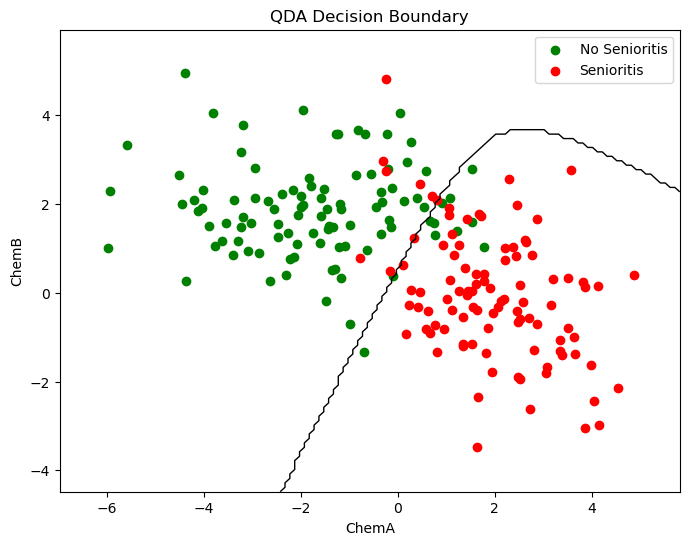

In [139]:
# QDA Decision Boundary:
def qda_classifier(x, mean_no_snrts, mean_snrts, cov_no_snrts, cov_snrts):
    term_no_snrts = -0.5 * np.dot(np.dot((x - mean_no_snrts), np.linalg.inv(cov_no_snrts)), (x - mean_no_snrts).T)
    term_snrts = -0.5 * np.dot(np.dot((x - mean_snrts), np.linalg.inv(cov_snrts)), (x - mean_snrts).T)
    return 1 if term_snrts > term_no_snrts else 0 

plt.figure(figsize=(8, 6))
plt.scatter(train_data[train_data['ClassLabel'] == 0]['ChemA'], train_data[train_data['ClassLabel'] == 0]['ChemB'], 
            color='green', label='No Senioritis')
plt.scatter(train_data[train_data['ClassLabel'] == 1]['ChemA'], train_data[train_data['ClassLabel'] == 1]['ChemB'], 
            color='red', label='Senioritis')


xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = np.array([qda_classifier(np.array([x, y]), mean_no_snrts, mean_snrts, cov_no_snrts, cov_snrts) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=1)

plt.xlabel('ChemA')
plt.ylabel('ChemB')
plt.title('QDA Decision Boundary')
plt.legend()
plt.show()


### (c)

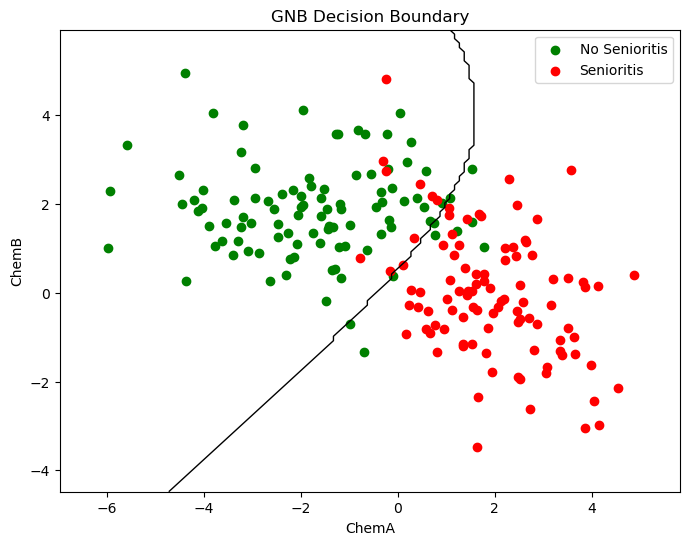

In [140]:
# GNB Decision Boundary
def gnb_classifier(x, mean_no_snrts, mean_snrts, var_no_snrts, var_snrts, p_no_snrts, p_snrts):
    likelihood_no_snrts = np.exp(-0.5 * ((x - mean_no_snrts) ** 2 / var_no_snrts).sum()) / np.sqrt((2 * np.pi) ** 2 * var_no_snrts.prod())
    likelihood_snrts = np.exp(-0.5 * ((x - mean_snrts) ** 2 / var_snrts).sum()) / np.sqrt((2 * np.pi) ** 2 * var_snrts.prod())
    posterior_no_snrts = p_no_snrts * likelihood_no_snrts
    posterior_snrts = p_snrts * likelihood_snrts
    return 1 if posterior_snrts > posterior_no_snrts else 0 

plt.figure(figsize=(8, 6))
plt.scatter(train_data[train_data['ClassLabel'] == 0]['ChemA'], train_data[train_data['ClassLabel'] == 0]['ChemB'], 
            color='green', label='No Senioritis')
plt.scatter(train_data[train_data['ClassLabel'] == 1]['ChemA'], train_data[train_data['ClassLabel'] == 1]['ChemB'], 
            color='red', label='Senioritis')

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = np.array([gnb_classifier(np.array([x, y]), mean_no_snrts, mean_snrts, var_no_snrts, var_snrts, p_no_snrts, p_snrts) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=1)

plt.xlabel('ChemA')
plt.ylabel('ChemB')
plt.title('GNB Decision Boundary')
plt.legend()
plt.show()


### (d)

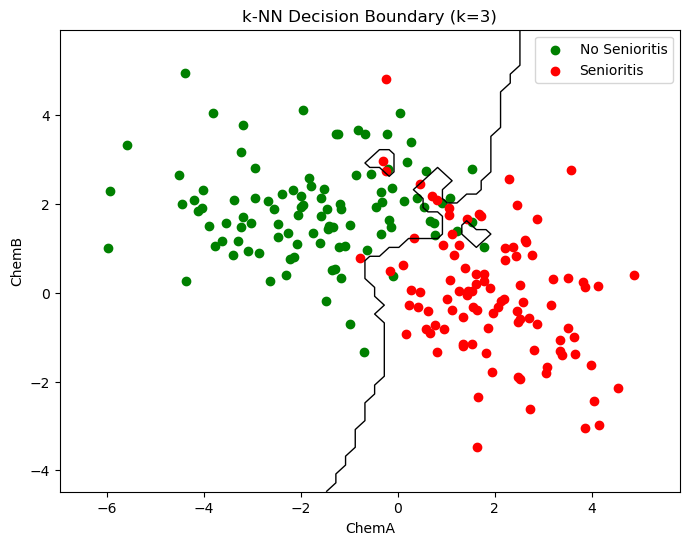

In [141]:

def knn_classifier_boundary(x, train_data, k=3):

    distances = np.linalg.norm(train_data[['ChemA', 'ChemB']].values - x, axis=1)
    k_nearest_indices = np.argsort(distances)[:k]
    k_nearest_labels = train_data.iloc[k_nearest_indices]['ClassLabel']
    return int(k_nearest_labels.mode()[0])

plt.figure(figsize=(8, 6))
plt.scatter(train_data[train_data['ClassLabel'] == 0]['ChemA'], train_data[train_data['ClassLabel'] == 0]['ChemB'], 
            color='green', label='No Senioritis')
plt.scatter(train_data[train_data['ClassLabel'] == 1]['ChemA'], train_data[train_data['ClassLabel'] == 1]['ChemB'], 
            color='red', label='Senioritis')

# decision boundary for k-NN (k=3)
x_min, x_max = train_data['ChemA'].min() - 1, train_data['ChemA'].max() + 1
y_min, y_max = train_data['ChemB'].min() - 1, train_data['ChemB'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))
grid_points = np.c_[xx.ravel(), yy.ravel()]  

Z = np.array([knn_classifier_boundary(point, train_data, k=3) for point in grid_points])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=1)
plt.xlabel('ChemA')
plt.ylabel('ChemB')
plt.title('k-NN Decision Boundary (k=3)')
plt.legend()
plt.show()


### (e)

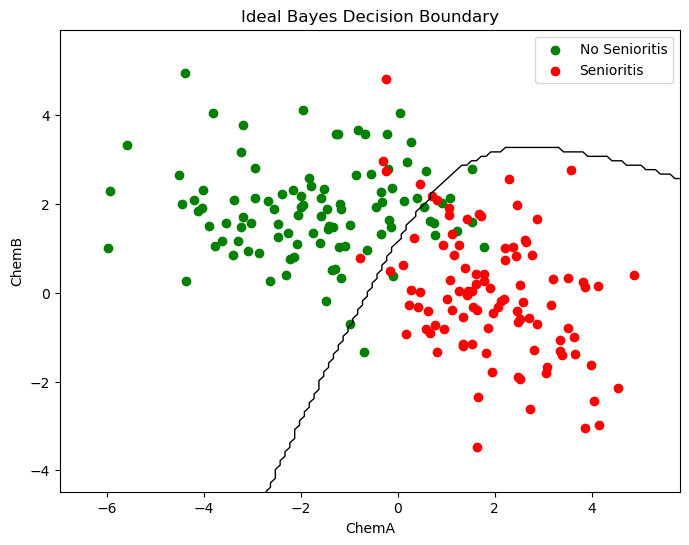

In [142]:
# Ideal Bayes Classifier Boundary
mean_no_snrts = np.array([-2, 2])
mean_snrts = np.array([2, 0])
cov_no_snrts = np.array([[3, 0], [0, 1]])
cov_snrts = np.array([[2, -1], [-1, 2]])

def bayes_classifier(x, mean_no_snrts, mean_snrts, cov_no_snrts, cov_snrts):
    term_no_snrts = -0.5 * np.dot(np.dot((x - mean_no_snrts), np.linalg.inv(cov_no_snrts)), (x - mean_no_snrts).T)
    term_snrts = -0.5 * np.dot(np.dot((x - mean_snrts), np.linalg.inv(cov_snrts)), (x - mean_snrts).T)
    return 1 if term_snrts > term_no_snrts else 0 

plt.figure(figsize=(8, 6))
plt.scatter(train_data[train_data['ClassLabel'] == 0]['ChemA'], train_data[train_data['ClassLabel'] == 0]['ChemB'], 
            color='green', label='No Senioritis')
plt.scatter(train_data[train_data['ClassLabel'] == 1]['ChemA'], train_data[train_data['ClassLabel'] == 1]['ChemB'], 
            color='red', label='Senioritis')

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = np.array([bayes_classifier(np.array([x, y]), mean_no_snrts, mean_snrts, cov_no_snrts, cov_snrts) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=1)

plt.xlabel('ChemA')
plt.ylabel('ChemB')
plt.title('Ideal Bayes Decision Boundary')
plt.legend()
plt.show()


## Problem 1.6


### (a)

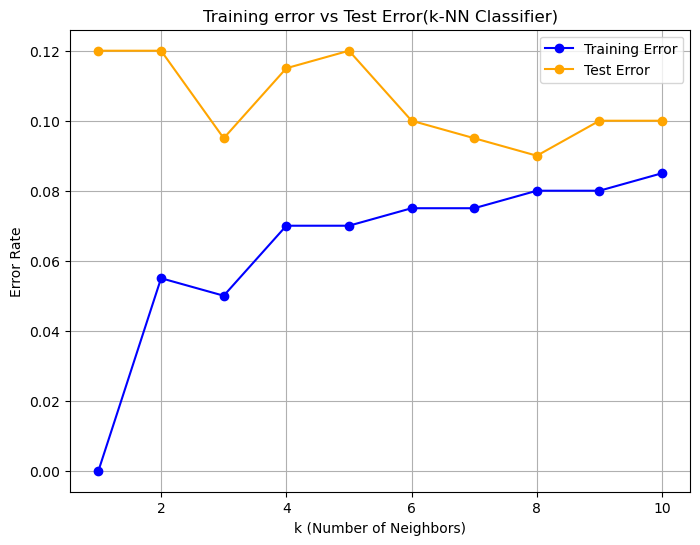

In [143]:
train_points = train_data[['ChemA', 'ChemB']].values
test_points = test_data[['ChemA', 'ChemB']].values

train_dstns = np.linalg.norm(train_points[:, None] - train_points[None, :], axis=2)  
test_dstns = np.linalg.norm(test_points[:, None] - train_points[None, :], axis=2)

def knn_error(k, distances, labels_true):
    errors = 0
    for i in range(len(distances)):
        k_indce = np.argsort(distances[i])[:k]
        k_lbl = train_data.iloc[k_indce]['ClassLabel']
        prdic_label = int(k_lbl.mode()[0])
        if prdic_label != labels_true[i]:
            errors += 1
    return errors / len(distances)

k_values = range(1, 11)
training_errors = []
test_errors = []

for k in k_values:
    train_error = knn_error(k, train_dstns, train_data['ClassLabel'].values)
    test_error = knn_error(k, test_dstns, test_data['ClassLabel'].values)
    training_errors.append(train_error)
    test_errors.append(test_error)

plt.figure(figsize=(8, 6))
plt.plot(k_values, training_errors, marker='o', label='Training Error', color='blue')
plt.plot(k_values, test_errors, marker='o', label='Test Error', color='orange')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Error Rate')
plt.title('Training error vs Test Error(k-NN Classifier)')
plt.legend()
plt.grid(True)
plt.show()


### (b)

Based on the training and test error plot, the suggested choice for k  is k = 3. At k = 3, the test error is relatively low while the training error remains reasonable and does not overfit to the training data as for smaller k values such as k = 1. while increasing k reduces the fluctuation in the decision boundaries, both the training and test errors increase, which is an indication of underfitting. Thus, k = 3  provides a good trade-off between bias and variance, making it an optimal choice for reliable diagnostics of Senioritis.